## Import all necessary libraries

In [10]:
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint


from scribblenet.ml.utils import load_classes, load_dataset, download_dataset
from scribblenet.preprocessing import PreProcessor

## Load the dataset

### Load class names

In [11]:
class_names = load_classes('100')
print(class_names)

['airplane', 'alarm_clock', 'anvil', 'apple', 'axe', 'baseball', 'baseball_bat', 'basketball', 'beard', 'bed', 'bench', 'bicycle', 'bird', 'book', 'bread', 'bridge', 'broom', 'butterfly', 'camera', 'candle', 'car', 'cat', 'ceiling_fan', 'cell_phone', 'chair', 'circle', 'clock', 'cloud', 'coffee_cup', 'cookie', 'cup', 'diving_board', 'donut', 'door', 'drums', 'dumbbell', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'flower', 'frying_pan', 'grapes', 'hammer', 'hat', 'headphones', 'helmet', 'hot_dog', 'ice_cream', 'key', 'knife', 'ladder', 'laptop', 'light_bulb', 'lightning', 'line', 'lollipop', 'microphone', 'moon', 'mountain', 'moustache', 'mushroom', 'pants', 'paper_clip', 'pencil', 'pillow', 'pizza', 'power_outlet', 'radio', 'rainbow', 'rifle', 'saw', 'scissors', 'screwdriver', 'shorts', 'shovel', 'smiley_face', 'snake', 'sock', 'spider', 'spoon', 'square', 'star', 'stop_sign', 'suitcase', 'sun', 'sword', 'syringe', 't-shirt', 'table', 'tennis_racquet', 'tent', 'tooth', 'traffic_li

### Download the dataset

In [ ]:
download_dataset(class_names)

### Load the dataset

In [12]:
X_train, y_train, X_test, y_test = load_dataset(num_samples_per_class=16000)

100%|██████████| 100/100 [00:04<00:00, 24.21it/s]


### Visualize a random sample from the training set

bench


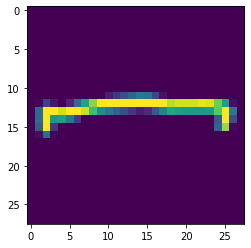

In [14]:
%matplotlib inline  
idx = randint(0, len(X_train))
plt.imshow(X_train[idx].reshape(28, 28)) 
print(class_names[int(y_train[idx].item())])

## Preprocessing

In [15]:
P = PreProcessor()
X_train, X_test, y_train, y_test = P.train_preprocess(X_train, X_test, y_train, y_test)
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (13400, 28, 28, 1), X_test: (6600, 28, 28, 1), y_train: (13400, 100), y_test: (6600, 100)


## Training

### Model definition

In [16]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))  # The number here should be equal to number of classes

opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

### Training the model

In [17]:
model.fit(x = X_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=1, epochs=10)

Epoch 1/10
48/48 [==============================] - 2s 30ms/step - loss: 4.3142 - top_k_categorical_accuracy: 0.1821 - val_loss: 3.6881 - val_top_k_categorical_accuracy: 0.3731
Epoch 2/10
48/48 [==============================] - 1s 28ms/step - loss: 3.2444 - top_k_categorical_accuracy: 0.5017 - val_loss: 3.0138 - val_top_k_categorical_accuracy: 0.5701
Epoch 3/10
48/48 [==============================] - 1s 29ms/step - loss: 2.7316 - top_k_categorical_accuracy: 0.6339 - val_loss: 2.7160 - val_top_k_categorical_accuracy: 0.6381
Epoch 4/10
48/48 [==============================] - 1s 29ms/step - loss: 2.4403 - top_k_categorical_accuracy: 0.7044 - val_loss: 2.4620 - val_top_k_categorical_accuracy: 0.7104
Epoch 5/10
48/48 [==============================] - 1s 29ms/step - loss: 2.2083 - top_k_categorical_accuracy: 0.7514 - val_loss: 2.3349 - val_top_k_categorical_accuracy: 0.7291
Epoch 6/10
48/48 [==============================] - 1s 30ms/step - loss: 2.0207 - top_k_categorical_accuracy: 0.785

## Evaluation

### Evaluate Test Score

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 80.24%


### Random test image and predicted class

['sword', 'syringe', 'snake', 'eyeglasses', 'pencil']


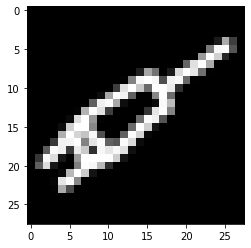

In [21]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(X_test))
img = X_test[idx]
plt.imshow(img.squeeze(),cmap='Greys_r') 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
print([class_names[x] for x in ind])

## Save the trained model

In [ ]:
model.save('trained_model.h5')